In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

## Disclaimer
This notebook based on labs from Inferential Statistics course by Duke University from https://www.coursera.org/learn/inferential-statistics-intro <br>
I adapted R code from these labs and reproduced in Jupyter Notebooks and rewrote in Python

## The data
We consider real estate data from the city of Ames, Iowa. The details of every real estate transaction in Ames is recorded by the City Assessor’s office. Our particular focus for this lab will be all residential home sales in Ames between 2006 and 2010. This collection represents our population of interest. In this lab we would like to learn about these home sales by taking smaller samples from the full population. Let’s load the data.

In [2]:
data_frame = pd.read_csv("https://raw.githubusercontent.com/AntonIsHere/Inferetial_Statistics/master/ames.csv")
# print(data_frame)
# data_frame.to_csv(output_file, index=False)
area = data_frame['area']

In [3]:
# Average:
area_avg = round(np.average(area),2)
# Median:
area_med = np.median(area)
# Standard Deviation:
area_sigma = round(np.std(area),2)
# Interquartile range:
q75, q25 = np.percentile(area, [75,25])
area_IQR = q75 - q25
# Min_Max
area_min = np.min(area)
area_max = np.max(area)
#First and Third quartile (25th and 75 percentile)
area_q1 = np.percentile(area, 25)
area_q3 = np.percentile(area, 75)
# Define percentile:
# q25, q0 = np.percentile(area, [75,50])

We see that there are quite a few variables in the data set, enough to do a very in-depth analysis. For this lab, we’ll restrict our attention to just two of the variables: the above ground living area of the house in square feet (area) and the sale price (price).

We can explore the distribution of areas of homes in the population of home sales visually and with summary statistics. 
Let’s first create a visualization, a histogram:

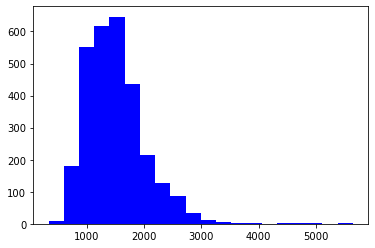

In [4]:
plt.hist(area,20, color = 'blue')
plt.show()

Let’s also obtain some summary statistics. Note that we can do this using the summarise function. We can calculate as many statistics as we want using this function, and just string along the results. Some of the functions below should be self explanatory (like mean, median, sd, IQR,  min, and max).

In [5]:
# Creating table
d = {'mu': [area_avg], 'pop_med': [area_med], 
     'sigma': [area_sigma], 'pop_iqr':[area_IQR],  
     'pop_min': [area_min], 'pop_max': [area_max], 
     'pop_q1': [area_q1], 'pop_q3':[area_q3]}
Summary_area_stat = pd.DataFrame(data = d)
Summary_area_stat

,mu,pop_med,sigma,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
0,1499.69,1442.0,505.42,616.75,334,5642,1126.0,1742.75


## The unknown sampling distribution

In this lab we have access to the entire population, but this is rarely the case in real life. Gathering information on an entire population is often extremely costly or impossible. Because of this, we often take a sample of the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a sample, we can use the following command to survey the population.

In [6]:
sample_size = 50
samp1 = random.sample(list(area), sample_size)

This command collects a simple random sample of size 50 from the ames dataset, which is assigned to samp1. This is like going into the City Assessor’s database and pulling up the files on 50 random home sales. Working with these 50 files would be considerably simpler than working with all 2930 home sales.

If we’re interested in estimating the average living area in homes in Ames using the sample, our best single guess is the sample mean.

In [7]:
samp1_mean = np.average(samp1)

Depending on which 50 homes you selected, your estimate could be a bit above or a bit below the true population mean of 1,499.69 square feet. In general, though, the sample mean turns out to be a pretty good estimate of the average living area, and we were able to get it by sampling less than 3% of the population.

Let’s take one more sample of size 50, and view the mean area in this sample:

In [8]:
samp2 = random.sample(list(area), sample_size)
samp2_mean = np.average(samp1)

Not surprisingly, every time we take another random sample, we get a different sample mean. It’s useful to get a sense of just how much variability we should expect when estimating the population mean this way. The distribution of sample means, called the sampling distribution, can help us understand this variability. In this lab, because we have access to the population, we can build up the sampling distribution for the sample mean by repeating the above steps many times. Here we will generate 15,000 samples and compute the sample mean of each. Note that we are sampling with replacement, replace = TRUE since sampling distributions are constructed with sampling with replacement.

In [9]:
area_mu50 = []

for i in range(15000): # 15000 times - we generate a random samples of 50 elements 
    samp_i = random.sample(list(area), sample_size)
    samp_avg_i = np.average(samp_i)
    # generates a list of averages of samples
    area_mu50.append(samp_avg_i) # sum all elements
# len(area_sample_list)

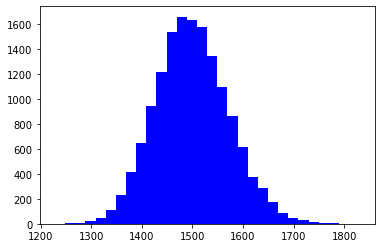

In [10]:
plt.hist(area_mu50,30, color = 'blue')
plt.show()

Here we use Python to take 15,000 samples of size 50 from the population, calculate the mean of each sample, and store each result in a vector caarea_mu50lled  area_mu50. Next, we review how this set of code works.